## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

### Importing libraries & inspecting the data

In [430]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

df = pd.read_csv('kc_house_data.csv')
df.drop('id', axis=1, inplace=True)

In [451]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 0 to 21596
Data columns (total 20 columns):
date             20964 non-null object
price            20964 non-null float64
bedrooms         20964 non-null int64
bathrooms        20964 non-null float64
sqft_living      20964 non-null int64
sqft_lot         20964 non-null int64
floors           20964 non-null float64
waterfront       20964 non-null float64
view             20964 non-null float64
condition        20964 non-null int64
grade            20964 non-null int64
sqft_above       20964 non-null int64
sqft_basement    20964 non-null object
yr_built         20964 non-null int64
yr_renovated     20964 non-null float64
zipcode          20964 non-null int64
lat              20964 non-null float64
long             20964 non-null float64
sqft_living15    20964 non-null int64
sqft_lot15       20964 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 4.0+ MB


### Notes:
* there are no duplicates
* waterfront only had 146 affirmative values, so I filled the nulls (2736) with negative values
* did the same with view & yr_renovated
* Removed outliers from bedrooms ( >7 rooms)
* Removed outliers from price ( >3840000)
* removed outliers from grade ( >11 & 4 (only one value for 4))
* removed outliers from sqft_living ( >6000)

### Dealing with NaN values (code has been run):

In [448]:
# df.waterfront.fillna(0.0, inplace=True)
# df.yr_renovated.fillna(0.0, inplace=True)
# df.view.fillna(0.0, inplace=True)

### Dealing with outliers (code has been run):

In [449]:
# df.drop(df[df.bedrooms > 7].index, inplace=True)
# df.drop(df[df.grade > 11].index, inplace=True)
# df.drop(df[df.grade ==4].index, inplace=True)
# df.drop(df[df.price==7060000.0].index, inplace=True)
# df.drop(df[df.sqft_living > 6000].index, inplace=True)
# df.drop(df[df.price==3850000.0].index, inplace=True)
# df.drop(df[df.sqft_lot > 40000].index, inplace=True)
# df.drop(df[df.bathrooms > 3.25].index, inplace=True)
# df.drop(df[df.bathrooms < 1.00].index, inplace=True)

### Column Definitions

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Checklist

* Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)
* You pose at least 3 meaningful questions and answer them through EDA. These questions should be well labeled and easy to identify inside the notebook.
* Your model should not include any predictors with p-values greater than .05.
* Your notebook shows an iterative approach to modeling, and details the parameters and results of the model at each iteration.
* You provide at least 1 paragraph explaining your final model.
* You pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset.

### Questions to be answered by EDA 

* Are there null values that need to be taken care of?
* Are there outliers that are throwing off normal-ish distribution?
* Is there multicolinearity among predictor variables?
* Do any of the predictor variables need to be transformed/normalized/standardized?

In [574]:
df_pred = df.loc[:, ['yr_built', 'bedrooms', 'sqft_living', 'grade', 'sqft_living15', 'sqft_lot', 'bathrooms']]

In [573]:
df.bathrooms.value_counts()

2.50    5053
1.00    3735
1.75    2882
2.25    1926
2.00    1834
1.50    1393
2.75    1107
3.00     689
3.25     515
Name: bathrooms, dtype: int64

### Scatter matrix with raw variables

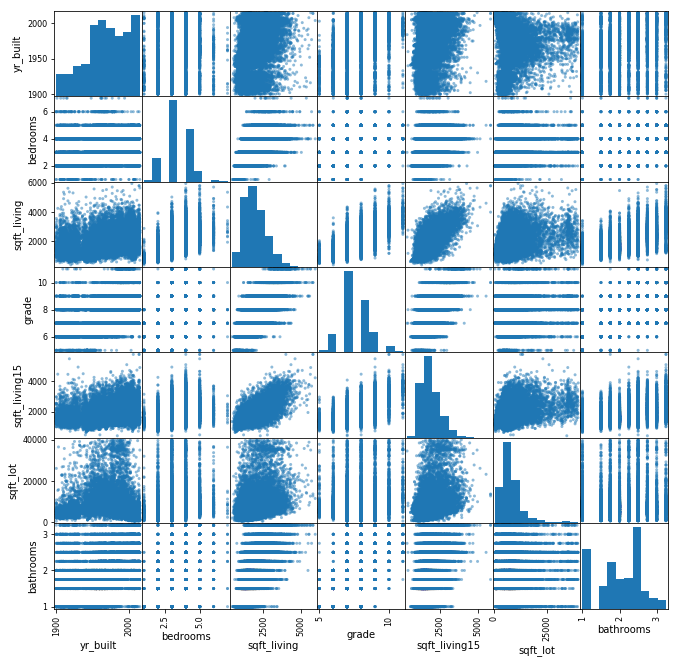

In [575]:
pd.plotting.scatter_matrix(df_pred, figsize=(11,11));

In [585]:
df_pred.corr() > .75

,yr_built,bedrooms,sqft_living,grade,sqft_living15,sqft_lot,bathrooms
yr_built,True,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False
sqft_living,False,False,True,False,True,False,False
grade,False,False,False,True,False,False,False
sqft_living15,False,False,True,False,True,False,False
sqft_lot,False,False,False,False,False,True,False
bathrooms,False,False,False,False,False,False,True


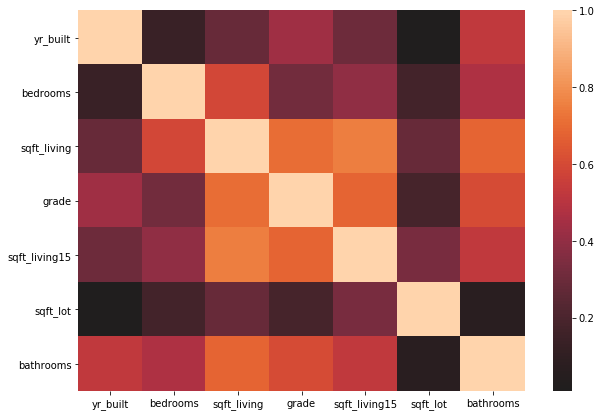

In [584]:
plt.figure(figsize=(10,7))
sns.heatmap(df_pred.corr(), center=0)

(array([3931., 8752., 4640., 1323.,  582.,  322.,  185.,  116.,  226.,
         169.]),
 array([  520.,  4464.,  8408., 12352., 16296., 20240., 24184., 28128.,
        32072., 36016., 39960.]),
 <a list of 10 Patch objects>)

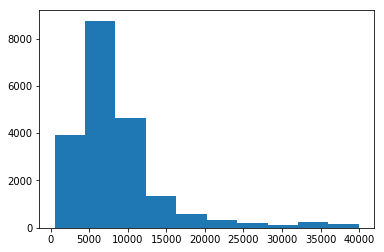

In [498]:
plt.hist(df.sqft_lot)

In [412]:
from statsmodels.formula.api import ols

In [414]:
target = 'price'
x_cols = ['bedrooms', 'sqft_living', 'grade']
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     7465.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        14:24:13   Log-Likelihood:            -2.9451e+05
No. Observations:               21412   AIC:                         5.890e+05
Df Residuals:                   21408   BIC:                         5.891e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.692e+05   1.42e+04    -33.128      0.000   -4.97e+05   -4.41e+05
bedrooms    -3.512e+04   2240.559    -15.675      0.000   -3.95e+04   -3.07e+04
sqft_living   180.9565      3.250     55.683      0.000     174.587     187.326
grade        9.748e+04   2127.991     45.807      0.000    9.33e+04    1.02e+05
==============================================================================
Omnibus:                    11646.401   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168119.369
Skew:                           2.301   Prob(JB):                         0.00
Kurtosis:                      15.933   Cond. No.                     2.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Making a second experimental dataframe and transforming variables

In [402]:
df2 = df.copy()

In [406]:
# nn = ['price', 'sqft_living']
# for thing in nn:
#     df2[thing] = df2[thing].map(lambda x: np.log(x))


# code has been run

### Scatter matrix with log variables (price and sqft_living)

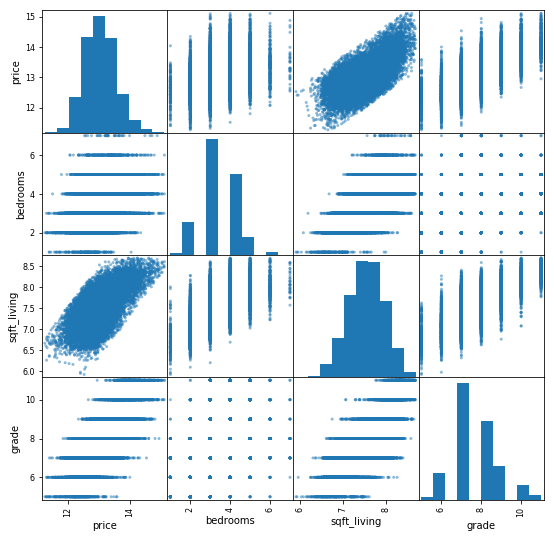

In [410]:
pd.plotting.scatter_matrix(df2_pred, figsize=(9,9));

In [385]:
abs(df2.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


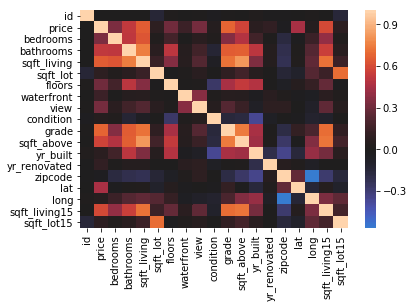

In [386]:
import seaborn as sns
sns.heatmap(df2.corr(), center=0);

### Investigate Outliers
* Bedrooms
* Sqft_living
* Price
* Grade

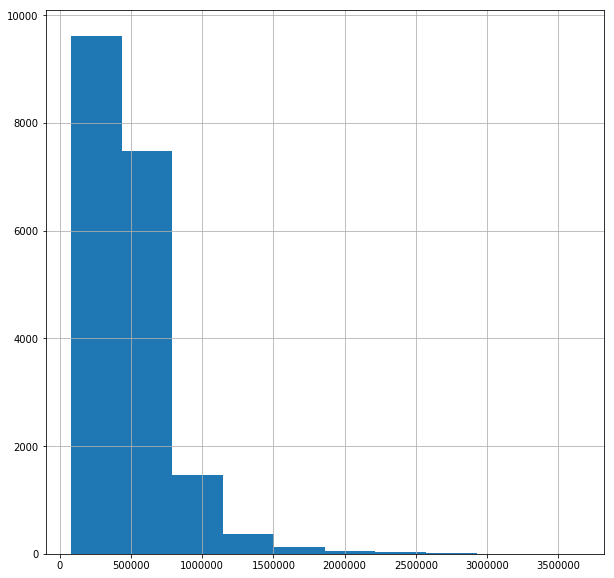

In [595]:
df.price.hist(figsize=(10,10))

In [596]:
print(len(df.loc[df.loc[:, 'price'] > 1500000.0].index))

217
